In [1]:
importing neccasey libraries

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.util import ngrams
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


In [2]:
df = pd.read_csv('comments.csv')

In [3]:
df2 =  pd.read_csv('comments1.0.csv')

In [4]:
df3 = pd.read_csv('comments2.0.csv')

In [5]:
df4= pd.read_csv('comments3.0.csv')

In [6]:
df5=pd.read_csv('comments4.0.csv')

In [7]:
df6=pd.read_csv('comments5.0.csv')

In [8]:
df.head()

Timestamp                                            Comment
0  2023-09-24T16:10:35Z  Which iPhone 15 would you choose? iPhone 15, i...
1  2023-10-02T09:43:18Z                                REPLY: Send me one😢
2  2023-10-02T08:45:47Z                            REPLY: 15pro or pro max
3  2023-10-01T18:47:49Z  REPLY: I’d choose a 15 pro. The camera feature...
4  2023-10-01T10:55:51Z        REPLY: Portland, JAMAICA in the Building!!!

In [9]:
dfs = [df, df2, df3, df4, df5, df6]

# Concatenating all DataFrames along the rows
merged_df = pd.concat(dfs, ignore_index=True)


In [10]:
merged_df.head

<bound method NDFrame.head of                   Timestamp                                            Comment
0      2023-09-24T16:10:35Z  Which iPhone 15 would you choose? iPhone 15, i...
1      2023-10-02T09:43:18Z                                REPLY: Send me one😢
2      2023-10-02T08:45:47Z                            REPLY: 15pro or pro max
3      2023-10-01T18:47:49Z  REPLY: I’d choose a 15 pro. The camera feature...
4      2023-10-01T10:55:51Z        REPLY: Portland, JAMAICA in the Building!!!
...                     ...                                                ...
60001  2023-09-13T05:51:55Z                       REPLY: <b>the real first</b>
60002  2023-09-13T05:40:55Z           REPLY: 🎉Congratulations! You are first!🎉
60003  2023-09-13T05:40:41Z                                REPLY: ur first lol
60004  2023-09-13T05:40:38Z                  REPLY: Ok, you are really the 1st
60005  2023-09-13T05:40:32Z                                         REPLY: Pro

[60006 rows x 2 colum

In [11]:

# Modifying the lambda function 
merged_df['Type'] = merged_df['Comment'].apply(lambda x: 'Reply' if isinstance(x, str) and x.startswith('REPLY') else 'Comment')

print(merged_df)

                  Timestamp  \
0      2023-09-24T16:10:35Z   
1      2023-10-02T09:43:18Z   
2      2023-10-02T08:45:47Z   
3      2023-10-01T18:47:49Z   
4      2023-10-01T10:55:51Z   
...                     ...   
60001  2023-09-13T05:51:55Z   
60002  2023-09-13T05:40:55Z   
60003  2023-09-13T05:40:41Z   
60004  2023-09-13T05:40:38Z   
60005  2023-09-13T05:40:32Z   

                                                 Comment     Type  
0      Which iPhone 15 would you choose? iPhone 15, i...  Comment  
1                                    REPLY: Send me one😢    Reply  
2                                REPLY: 15pro or pro max    Reply  
3      REPLY: I’d choose a 15 pro. The camera feature...    Reply  
4            REPLY: Portland, JAMAICA in the Building!!!    Reply  
...                                                  ...      ...  
60001                       REPLY: <b>the real first</b>    Reply  
60002           REPLY: 🎉Congratulations! You are first!🎉    Reply  
60003          

In [12]:
merged_df.shape

(60006, 3)

In [13]:
# Converting column to datetime format
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

# Sorting the DataFrame by 'Timestamp' in ascending order as oldest dates come first
merged_df.sort_values(by='Timestamp', ascending=True, inplace=True)

# Resetting the index of the DataFrame after sorting
merged_df.reset_index(drop=True, inplace=True)

print(merged_df)

                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  
0                                                  First  Comment  
1                                                      W  Comment  
2                                                    Oof  Comment  
3                                                  Furst  Comment  
4                                                  First  Comment  
...                                                  ...      ...  
60001           REPLY: Congratulations 🎁<br>Get in touch    Reply  
60002           REPLY: Congratulati

In [14]:
merged_df['Comment'] = merged_df['Comment'].str.lower()

print(merged_df)

                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  
0                                                  first  Comment  
1                                                      w  Comment  
2                                                    oof  Comment  
3                                                  furst  Comment  
4                                                  first  Comment  
...                                                  ...      ...  
60001           reply: congratulations 🎁<br>get in touch    Reply  
60002           reply: congratulati

In [15]:
merged_df['Comment'] = merged_df['Comment'].str.replace('reply', '', case=False, regex=True)

print(merged_df)

                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  
0                                                  first  Comment  
1                                                      w  Comment  
2                                                    oof  Comment  
3                                                  furst  Comment  
4                                                  first  Comment  
...                                                  ...      ...  
60001                : congratulations 🎁<br>get in touch    Reply  
60002                : congratulati

In [16]:
merged_df['Comment'] = merged_df['Comment'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

print(merged_df)

                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  
0                                                  first  Comment  
1                                                      w  Comment  
2                                                    oof  Comment  
3                                                  furst  Comment  
4                                                  first  Comment  
...                                                  ...      ...  
60001                     congratulations brget in touch    Reply  
60002                     congratul

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Removing stop words from the 'Comment' column, considering non-string values
merged_df['Comment'] = merged_df['Comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]) if isinstance(x, str) else x
)

print(merged_df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  
0                                                  first  Comment  
1                                                      w  Comment  
2                                                    oof  Comment  
3                                                  furst  Comment  
4                                                  first  Comment  
...                                                  ...      ...  
60001                        congratulations brget touch    Reply  
60002                        congra

In [18]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
merged_df['Tokenized_Comment'] = merged_df['Comment'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

print(merged_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\exper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  \
0                                                  first  Comment   
1                                                      w  Comment   
2                                                    oof  Comment   
3                                                  furst  Comment   
4                                                  first  Comment   
...                                                  ...      ...   
60001                        congratulations brget touch    Reply   
60002                      

In [19]:

# Downloading the vader lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initializing the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Dropping rows where 'Comment' column is null
merged_df.dropna(subset=['Comment'], inplace=True)

# Applying VADER sentiment analysis
merged_df['Sentiment_Scores'] = merged_df['Comment'].apply(lambda x: sid.polarity_scores(x))
merged_df['Compound_Score'] = merged_df['Sentiment_Scores'].apply(lambda score_dict: score_dict['compound'])

print(merged_df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\exper\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                      Timestamp  \
0     2023-05-06 13:18:20+00:00   
1     2023-05-06 13:18:21+00:00   
2     2023-05-06 13:18:22+00:00   
3     2023-05-06 13:18:22+00:00   
4     2023-05-06 13:18:23+00:00   
...                         ...   
60001 2023-10-05 03:13:30+00:00   
60002 2023-10-05 03:14:06+00:00   
60003 2023-10-05 03:14:19+00:00   
60004 2023-10-05 08:14:07+00:00   
60005 2023-10-05 10:32:08+00:00   

                                                 Comment     Type  \
0                                                  first  Comment   
1                                                      w  Comment   
2                                                    oof  Comment   
3                                                  furst  Comment   
4                                                  first  Comment   
...                                                  ...      ...   
60001                        congratulations brget touch    Reply   
60002                      

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


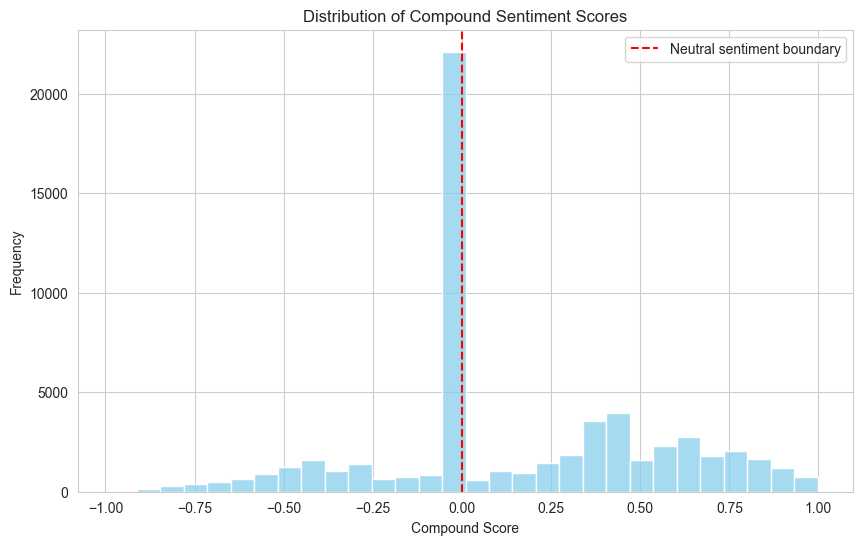

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a histogram of the Compound_Score
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Compound_Score'], bins=30, kde=False, color='skyblue')

plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral sentiment boundary')
plt.legend()
plt.show()

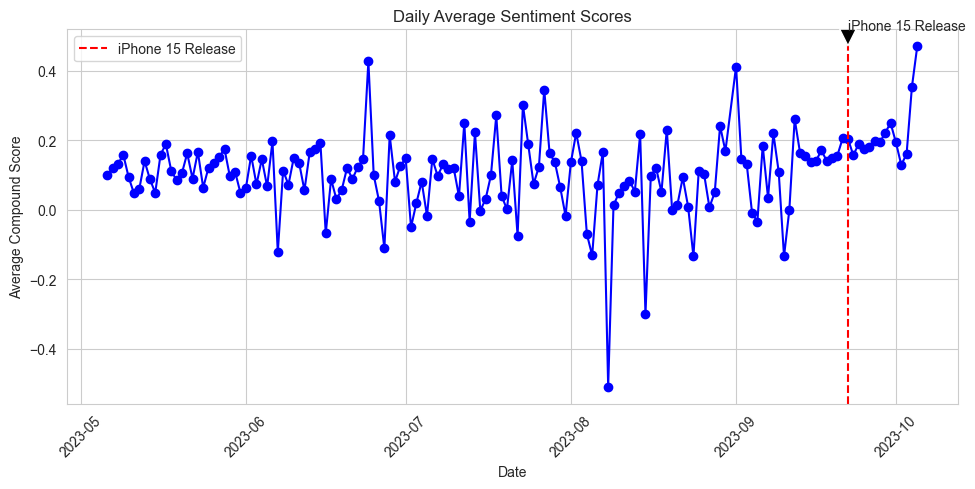

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if 'Timestamp' is not the index
if 'Timestamp' in merged_df.columns:
    # Ensure the 'Timestamp' column is in datetime format
    merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])
    # Set the 'Timestamp' column as the index
    merged_df.set_index('Timestamp', inplace=True)

# Resample the data by day and calculate the mean sentiment score
daily_sentiment = merged_df.resample('D')['Compound_Score'].mean()

# Drop NaN values (days without data)
daily_sentiment.dropna(inplace=True)

# Visualizing the daily sentiment scores
plt.figure(figsize=(10, 5))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-', color='b')

# Highlight the iPhone 15 release date
release_date = pd.Timestamp('2023-09-22')
plt.axvline(x=release_date, color='r', linestyle='--', label='iPhone 15 Release')
plt.annotate('iPhone 15 Release', xy=(release_date, daily_sentiment.max()), xytext=(release_date, daily_sentiment.max()*1.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Daily Average Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

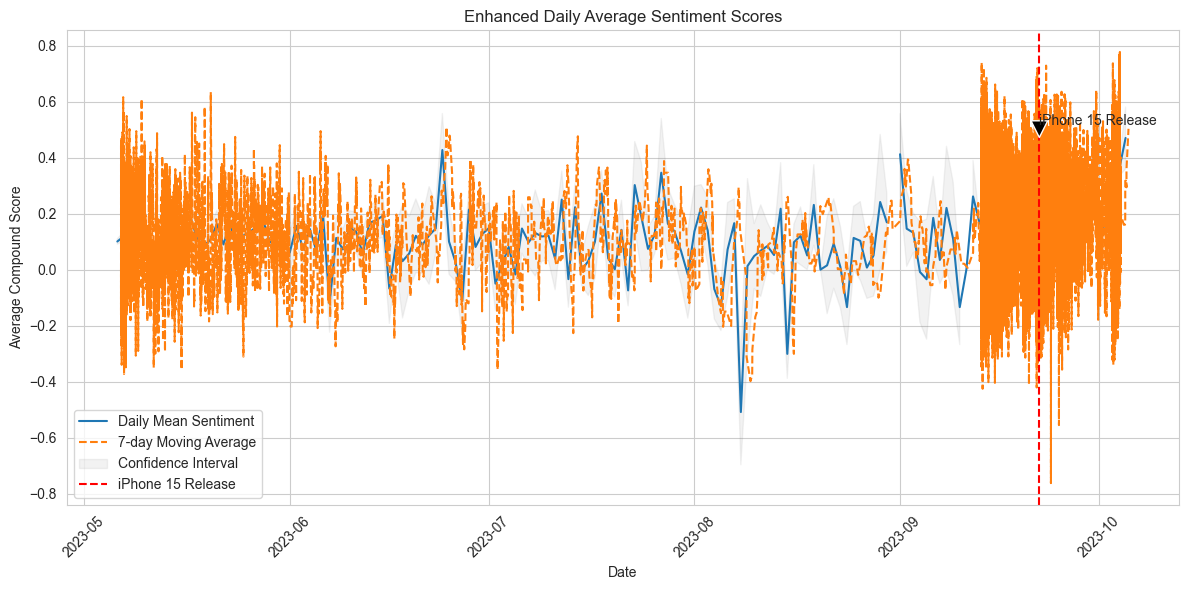

In [22]:
# Calculating 7-day moving average
merged_df['MA7'] = merged_df['Compound_Score'].rolling(window=7).mean()

# Resampling data by day for confidence intervals
daily_sentiment = merged_df.resample('D')['Compound_Score'].agg(['mean', 'std'])
daily_sentiment['upper'] = daily_sentiment['mean'] + (daily_sentiment['std'] / np.sqrt(merged_df.resample('D').size()))
daily_sentiment['lower'] = daily_sentiment['mean'] - (daily_sentiment['std'] / np.sqrt(merged_df.resample('D').size()))

# Visualizing the daily sentiment scores with enhancements
plt.figure(figsize=(12, 6))

# Plotting mean sentiment
plt.plot(daily_sentiment.index, daily_sentiment['mean'], label='Daily Mean Sentiment')

# Plotting moving averages
plt.plot(merged_df.index, merged_df['MA7'], label='7-day Moving Average', linestyle='dashed')

# Plotting confidence intervals
plt.fill_between(daily_sentiment.index, daily_sentiment['upper'], daily_sentiment['lower'], color='gray', alpha=0.1, label='Confidence Interval')

# Highlighting the iPhone 15 release date
plt.axvline(x=release_date, color='r', linestyle='--', label='iPhone 15 Release')
plt.annotate('iPhone 15 Release', xy=(release_date, daily_sentiment['mean'].max()), xytext=(release_date, daily_sentiment['mean'].max()*1.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Enhanced Daily Average Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Assuming `merged_df['Tokenized_Comment']` contains the preprocessed and tokenized comments
documents = merged_df['Tokenized_Comment'].dropna()

# Creating the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(documents)

# Convert list of documents (corpus) into Document Term Matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]


In [24]:
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                    chunksize=1000, passes=10)

In [25]:
# Print the Keyword in the topics
lda_model.print_topics(-1)

[(0,
  '0.097*"iphone" + 0.047*"pro" + 0.038*"15" + 0.036*"joke" + 0.018*"max" + 0.014*"14" + 0.014*"im" + 0.012*"get" + 0.011*"ultra" + 0.010*"120hz"'),
 (1,
  '0.021*"apple" + 0.018*"better" + 0.015*"app" + 0.014*"video" + 0.012*"samsung" + 0.011*"phone" + 0.011*"people" + 0.011*"know" + 0.010*"like" + 0.010*"camera"'),
 (2,
  '0.033*"apple" + 0.027*"new" + 0.023*"phone" + 0.021*"like" + 0.018*"iphone" + 0.013*"android" + 0.012*"phones" + 0.011*"samsung" + 0.011*"features" + 0.010*"care"'),
 (3,
  '0.028*"weather" + 0.012*"mode" + 0.011*"it39s" + 0.009*"comparison" + 0.009*"lot" + 0.009*"use" + 0.009*"battery" + 0.009*"lucky" + 0.009*"using" + 0.008*"whats"'),
 (4,
  '0.054*"60hz" + 0.027*"winner" + 0.022*"usb" + 0.019*"notice" + 0.017*"c" + 0.012*"comment" + 0.011*"usbc" + 0.010*"thanks" + 0.009*"video" + 0.009*"apple"')]

In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Make sure that you are using the correct import based on your gensim and pyLDAvis version

# Visualizing the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

In [27]:
import pandas as pd
import plotly.express as px

def format_topics_sentences(ldamodel, corpus):
    topic_data = []
    
    for i, row_list in enumerate(ldamodel[corpus]):
        row = sorted(row_list, key=lambda x: x[1], reverse=True)
        topic_num, prop_topic = row[0]
        topic_keywords = ", ".join([word for word, prop in ldamodel.show_topic(topic_num)])
        topic_data.append({'Dominant_Topic': topic_num, 'Perc_Contribution': round(prop_topic, 4), 'Topic_Keywords': topic_keywords})
    
    return pd.DataFrame(topic_data)

# Applying the function to your data
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix)

# Visualizing the data
fig = px.histogram(df_topic_sents_keywords, x='Dominant_Topic', 
                   title='Distribution of Dominant Topics in Documents',
                   labels={'Dominant_Topic': 'Topic Number'}, 
                   template='plotly_white', nbins=20)
fig.update_xaxes(type='category')
fig.show()

In [28]:
import gensim
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Assuming documents is your tokenized and cleaned data
texts = [" ".join(doc) for doc in documents]  # Converting tokenized documents to text

# Vectorization for NMF and LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(texts)

# Applying NMF
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)

# Applying LSA (LSI)
lsa_model = TruncatedSVD(n_components=5, random_state=42)
lsa_model.fit(tfidf)

# Function to display topics
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# Displaying NMF topics
print("NMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out())

# Displaying LSA topics
print("\nLSA Topics:")
display_topics(lsa_model, tfidf_vectorizer.get_feature_names_out())

# Applying LDA using Gensim as you were originally doing
dictionary_gensim = gensim.corpora.Dictionary(documents)
doc_term_matrix_gensim = [dictionary_gensim.doc2bow(doc) for doc in documents]

lda_model_gensim = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix_gensim,
                                                   id2word=dictionary_gensim,
                                                   num_topics=5, 
                                                   random_state=42,
                                                   update_every=1,
                                                   chunksize=100,
                                                   passes=10,
                                                   alpha='auto',
                                                   per_word_topics=True)

# Displaying LDA topics
print("\nLDA Topics:")
for idx, topic in lda_model_gensim.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

NMF Topics:
Topic 0:
pro max 15 14 upgrade 13 12 im worth upgrading
Topic 1:
apple phone new like year dont years usb usbc im
Topic 2:
hey arun video app weather marques know mkbhd bro whats
Topic 3:
iphone 15 14 16 plus new buy watching 11 better
Topic 4:
samsung ultra s23 better s24 wait video camera galaxy best

LSA Topics:
Topic 0:
iphone pro 15 max 14 phone new apple im upgrade
Topic 1:
pro max 15 14 13 12 upgrading vs 11 plus
Topic 2:
hey pro max arun weather app 14 marques video know
Topic 3:
iphone 15 samsung ultra s23 hey better s24 watching plus
Topic 4:
ultra samsung s23 s24 better video wait camera galaxy max

LDA Topics:
Topic: 0 
Words: 0.115*"iphone" + 0.068*"pro" + 0.054*"15" + 0.023*"winner" + 0.023*"14" + 0.022*"120hz" + 0.020*"even" + 0.019*"really" + 0.018*"max" + 0.015*"buy"

Topic: 1 
Words: 0.047*"apple" + 0.029*"like" + 0.023*"dont" + 0.021*"60hz" + 0.020*"people" + 0.016*"would" + 0.015*"year" + 0.015*"still" + 0.013*"years" + 0.013*"know"

Topic: 2 
Words: 0.0

NMF Topics:


C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



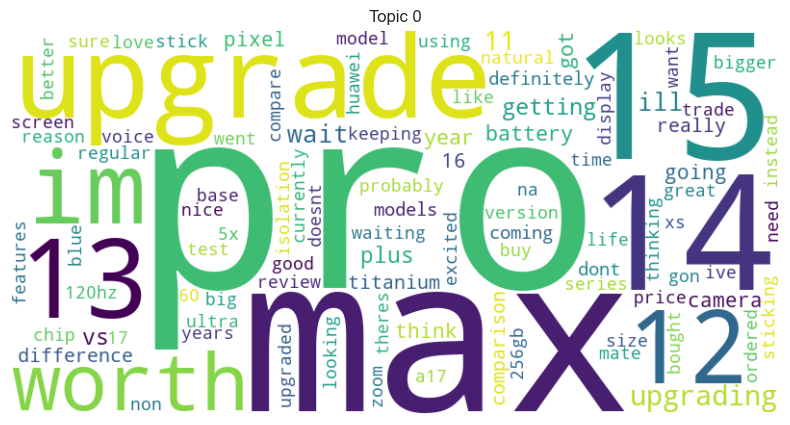

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



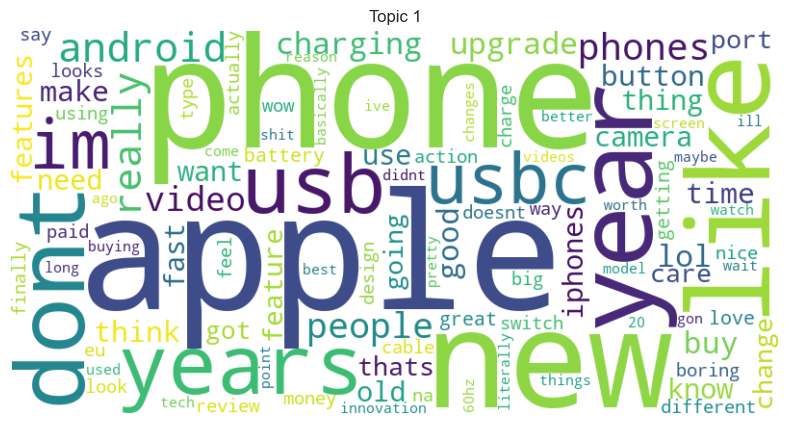

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



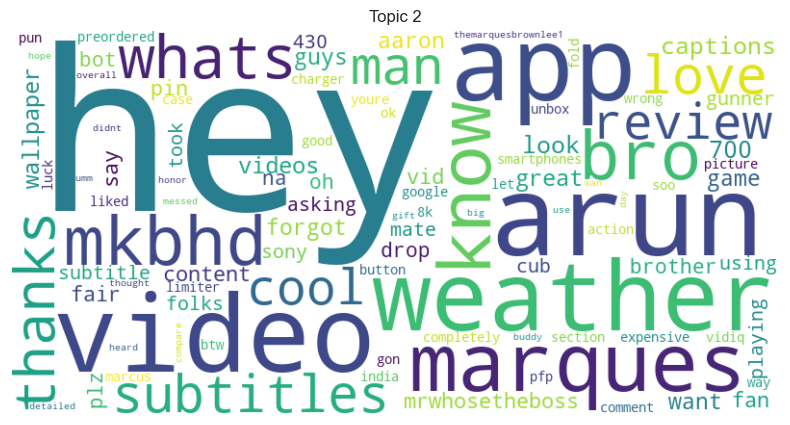

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



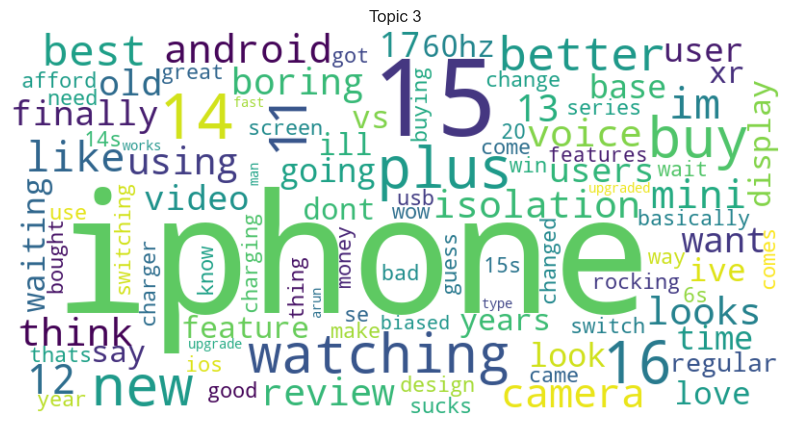

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



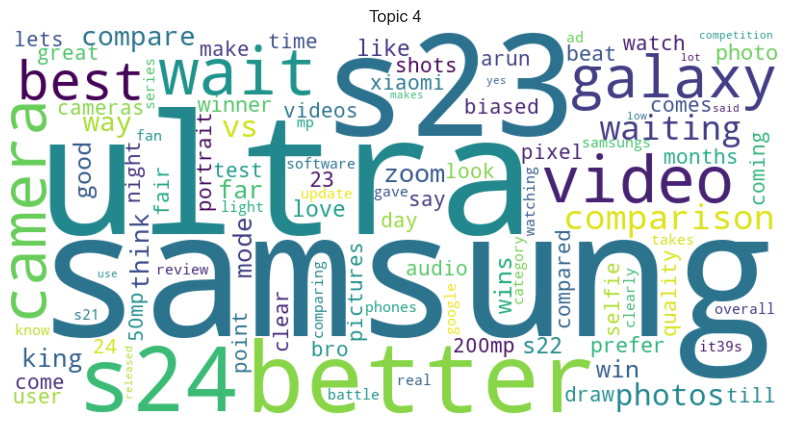


LSA Topics:


C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



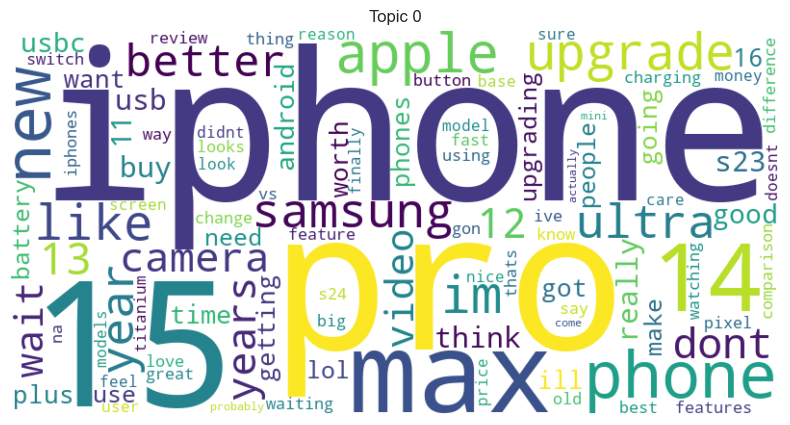

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



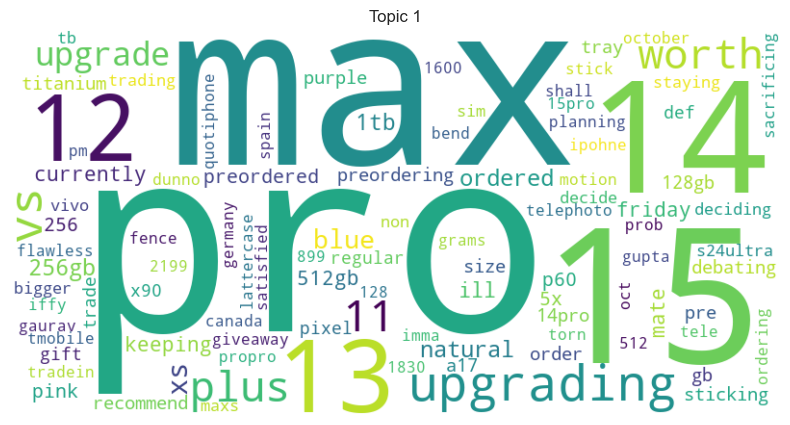

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



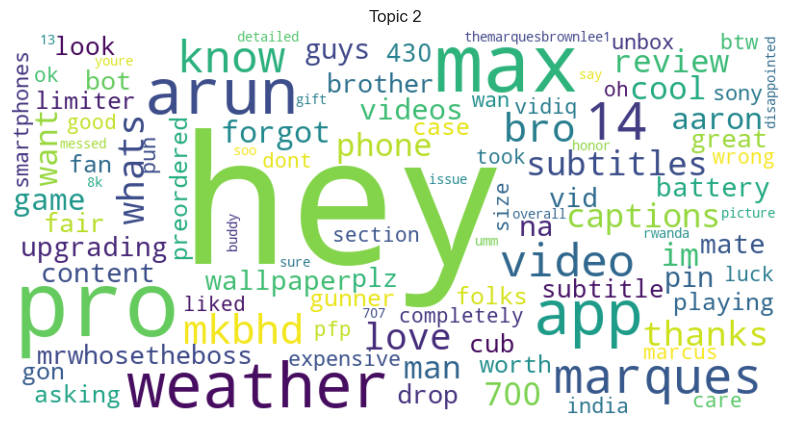

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



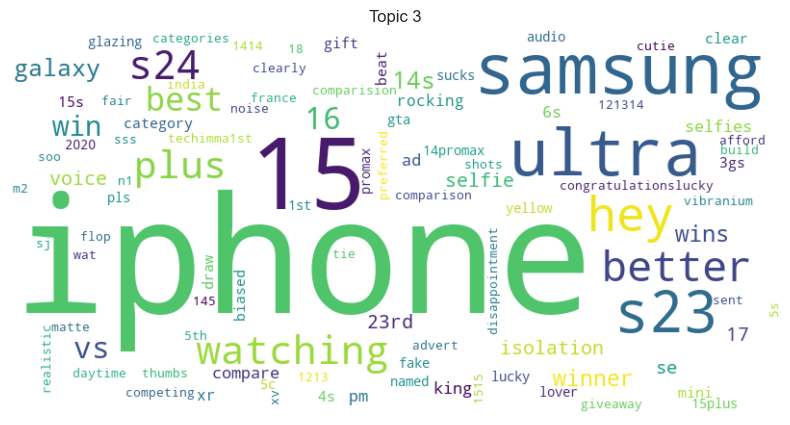

C:\Users\exper\anaconda3new\envs\socialmedia\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



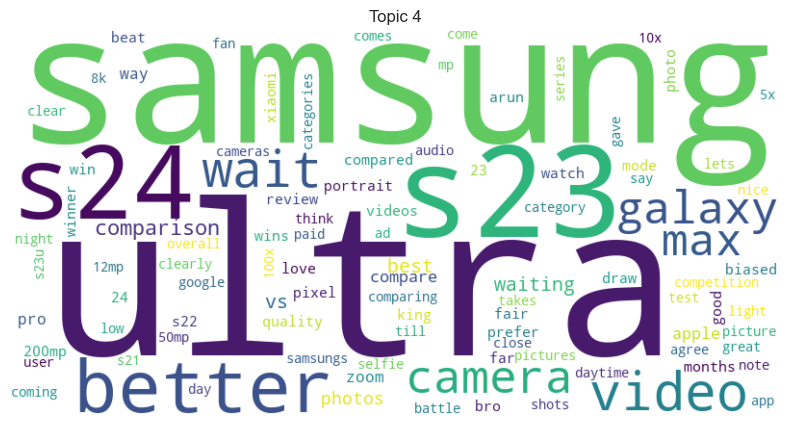

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(model, feature_names, n_words=100, n_topics=5):
    for topic_idx, topic in enumerate(model.components_[:n_topics]):
        top_words_weight = [(feature_names[i], topic[i]) for i in topic.argsort()[:-n_words - 1:-1]]
        wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(top_words_weight))
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx}')
        plt.axis('off')
        plt.show()

# Displaying NMF topics
print("NMF Topics:")
show_wordcloud(nmf_model, tfidf_vectorizer.get_feature_names_out())

# Displaying LSA topics
print("\nLSA Topics:")
show_wordcloud(lsa_model, tfidf_vectorizer.get_feature_names_out())

NMF Topics:


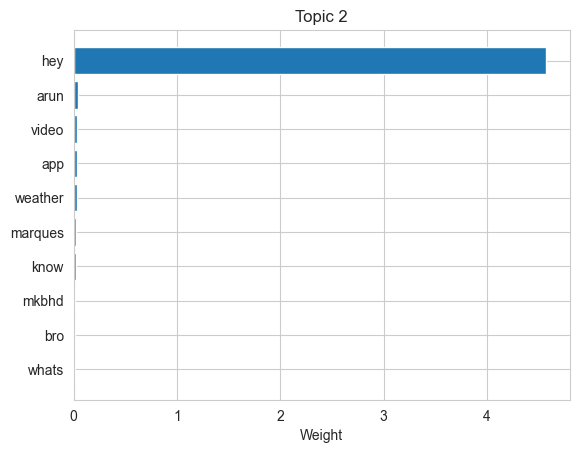

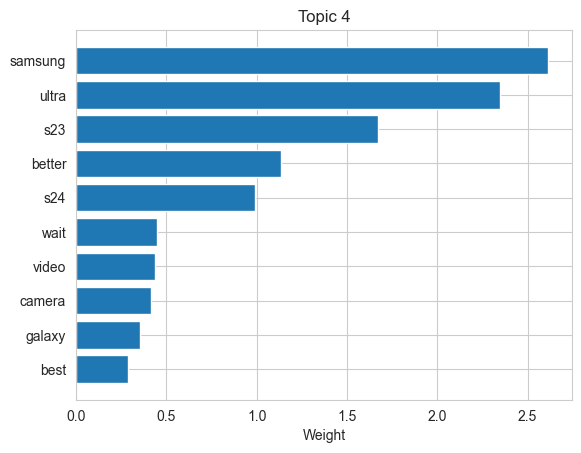


LSA Topics:


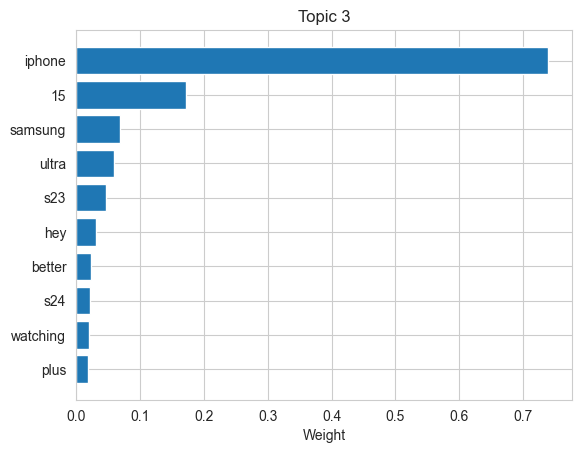

In [30]:
import numpy as np

def show_barchart(model, feature_names, n_words=10, n_topics=5):
    for topic_idx, topic in enumerate(model.components_[:n_topics]):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_shares = topic[top_words_idx]
        
        fig, ax = plt.subplots()
        y_pos = np.arange(len(top_words))
        ax.barh(y_pos, top_words_shares, align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_words)
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Weight')
        ax.set_title(f'Topic {topic_idx}')
        
        plt.show()

# Displaying NMF topics
print("NMF Topics:")
show_barchart(nmf_model, tfidf_vectorizer.get_feature_names_out())

# Displaying LSA topics
print("\nLSA Topics:")
show_barchart(lsa_model, tfidf_vectorizer.get_feature_names_out())

In [31]:
# Assuming df is your DataFrame and it has a 'Compound_Score' column
def assign_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['Sentiment_Category'] = merged_df['Compound_Score'].apply(assign_sentiment_category)

# Group by the Sentiment_Category and get the size of each group
sentiment_counts = merged_df['Sentiment_Category'].value_counts()

# Plotting
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Sentiment')
plt.xticks(rotation=0)
plt.show()